### Import

In [10]:
import os

In [11]:
import numpy as np
import pandas as np

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
from IPython.display import display
from PIL import Image

In [14]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

### First steps

In [15]:
DATA_PATH = 'data'

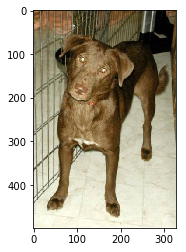

In [16]:
dog_img_name = os.path.join(DATA_PATH, 'train/dog/1.jpg')
dog_img = plt.imread(dog_img_name)
plt.imshow(dog_img)
plt.show()

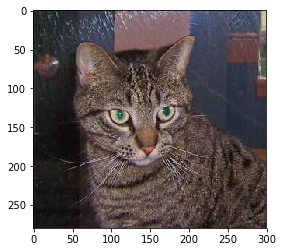

In [17]:
cat_img_name = os.path.join(DATA_PATH, 'train/cat/1.jpg')
cat_img = plt.imread(cat_img_name)
plt.imshow(cat_img)
plt.show()

### Train preparation

In [18]:
# dimensions of our images.
img_width, img_height = 150, 150

In [19]:
epochs = 20
batch_size = 16

In [20]:
train_data_dir = os.path.join(DATA_PATH, 'train')
validation_data_dir = os.path.join(DATA_PATH, 'validation')
test_data_dir = os.path.join(DATA_PATH, 'test')

nb_train_samples = len(os.listdir(os.path.join(DATA_PATH, 'train/dog'))) + len(os.listdir(os.path.join(DATA_PATH, 'train/cat')))
nb_validation_samples = len(os.listdir(os.path.join(DATA_PATH, 'validation/dog'))) + len(os.listdir(os.path.join(DATA_PATH, 'validation/cat')))

In [21]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

### Create neural network

In [22]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [24]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

### Data preparation

In [25]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [26]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [27]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.


In [28]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2500 images belonging to 2 classes.


In [29]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2500 images belonging to 2 classes.


### Training

In [30]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
1250/1250 [==============================] - 448s 358ms/step - loss: 0.6372 - acc: 0.6428 - val_loss: 0.5494 - val_acc: 0.7276
Epoch 2/20
1250/1250 [==============================] - 483s 386ms/step - loss: 0.5737 - acc: 0.7146 - val_loss: 0.5236 - val_acc: 0.7375
Epoch 3/20
1250/1250 [==============================] - 470s 376ms/step - loss: 0.5575 - acc: 0.7364 - val_loss: 0.4727 - val_acc: 0.7762
Epoch 4/20
1250/1250 [==============================] - 430s 344ms/step - loss: 0.5277 - acc: 0.7509 - val_loss: 0.4211 - val_acc: 0.8027
Epoch 5/20
1250/1250 [==============================] - 481s 385ms/step - loss: 0.5195 - acc: 0.7598 - val_loss: 0.4576 - val_acc: 0.7963
Epoch 6/20
1250/1250 [==============================] - 424s 339ms/step - loss: 0.5103 - acc: 0.7686 - val_loss: 0.4607 - val_acc: 0.7846
Epoch 7/20
1250/1250 [==============================] - 400s 320ms/step - loss: 0.4980 - acc: 0.7714 - val_loss: 0.4521 - va

### Model evaluation

In [48]:
STEP_SIZE_TEST = test_generator.n // test_generator.batch_size
scores = model.evaluate_generator(test_generator, steps=STEP_SIZE_TEST)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


acc: 84.54%


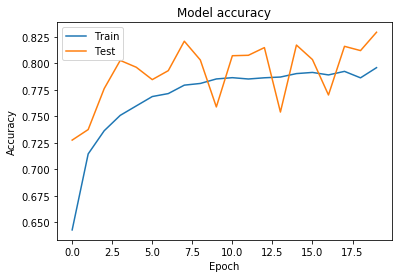

In [32]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

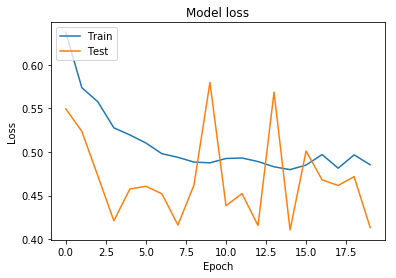

In [33]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()